<h1> Load, visualize and extract features of the USC-HAR dataset </h1>

In [124]:
import numpy as np
import pandas as pd
pd.set_option('html',False)

<h2>Fast tabular data IO</h2>

In [125]:
# Import all libraries needed for the tutorial
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import sys #only needed to determine Python version number

# Enable inline plotting
%matplotlib inline

train_x = '/home/hessenh/Development/Prosjektoppgave/Notebook/K-Nearest-Neighbors-with-Dynamic-Time-Warping-master/data/UCI-HAR-Dataset/train/Inertial Signals/body_acc_x_train.txt'
train_y = '/home/hessenh/Development/Prosjektoppgave/Notebook/K-Nearest-Neighbors-with-Dynamic-Time-Warping-master/data/UCI-HAR-Dataset/train/Inertial Signals/body_acc_y_train.txt'
train_z = '/home/hessenh/Development/Prosjektoppgave/Notebook/K-Nearest-Neighbors-with-Dynamic-Time-Warping-master/data/UCI-HAR-Dataset/train/Inertial Signals/body_acc_z_train.txt'
train_l = '/home/hessenh/Development/Prosjektoppgave/Notebook/K-Nearest-Neighbors-with-Dynamic-Time-Warping-master/data/UCI-HAR-Dataset/train/y_train.txt'


print 'Python version ' + sys.version
print 'Pandas version ' + pd.__version__

Python version 2.7.6 (default, Jun 22 2015, 17:58:13) 
[GCC 4.8.2]
Pandas version 0.16.2


In [126]:
df_x = pd.read_csv(train_x, header=None, sep='\s+')
df_x.info()
print 
df_y = pd.read_csv(train_y, header=None, sep='\s+')
df_y.info()
print 
df_z = pd.read_csv(train_z, header=None, sep='\s+')
df_z.info()
print 
df_l = pd.read_csv(train_l, header=None, sep='\s+')
df_l.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7352 entries, 0 to 7351
Columns: 128 entries, 0 to 127
dtypes: float64(128)
memory usage: 7.2 MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7352 entries, 0 to 7351
Columns: 128 entries, 0 to 127
dtypes: float64(128)
memory usage: 7.2 MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7352 entries, 0 to 7351
Columns: 128 entries, 0 to 127
dtypes: float64(128)
memory usage: 7.2 MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7352 entries, 0 to 7351
Data columns (total 1 columns):
0    7352 non-null int64
dtypes: int64(1)
memory usage: 114.9 KB


<h2>Get first instance. Each instance is equal to one sliding window.</h2>

In [127]:
# First 10 values of the first instance in the x-acc-data
df_x.iloc[0][0:10]

0    0.000181
1    0.010139
2    0.009276
3    0.005066
4    0.010810
5    0.004045
6    0.004757
7    0.006214
8    0.003307
9    0.007572
Name: 0, dtype: float64

In [128]:
# First value of the first instanceof t
df_l.iloc[0]

0    5
Name: 0, dtype: int64

<h3>Data description</h3>

<p>1 WALKING</p>
<p>2 WALKING_UPSTAIRS</p>
<p>3 WALKING_DOWNSTAIRS</p>
<p>4 SITTING</p>
<p>5 STANDING</p>
<p>6 LAYING</p>

<h3>Merge data and labels</h3>

In [129]:
print len(df_x.values[0])
df_n = pd.concat([df_x,df_y],axis=1,ignore_index=True)
print len(df_n.values[0])

128
256


<h2>Extract the values we will use </h2>

In [130]:
df_n = df_n[[0,1,2,len(df_n.values[0])-1]]
df_n.rename(columns={0: 'x', 1: 'y', 2: 'z',561: 'a'}, inplace=True)

<h3>Group the activities</h3>

In [131]:
df_walk_x = df_x[df_l[0] == 1]
df_walk_y = df_y[df_l[0] == 1]
df_walk_z = df_z[df_l[0] == 1]
print "Walking: ",len(df_walk_x) 
df_walk_up_x = df_x[df_l[0] == 2]
df_walk_up_y = df_y[df_l[0] == 2]
df_walk_up_z = df_z[df_l[0] == 2]
print "Walking up: ",len(df_walk_up_x)
df_walk_down_x = df_x[df_l[0] == 3]
df_walk_down_y = df_y[df_l[0] == 3]
df_walk_down_z = df_z[df_l[0] == 3]
print "Walking down: ",len(df_walk_down_x)
df_sitting_x = df_x[df_l[0] == 4]
df_sitting_y = df_y[df_l[0] == 4]
df_sitting_z = df_z[df_l[0] == 4]
print "Sitting: ",len(df_sitting_x)
df_standing_x = df_x[df_l[0] == 5]
df_standing_y = df_y[df_l[0] == 5]
df_standing_z = df_z[df_l[0] == 5]
print "Standing: ",len(df_standing_x)
df_laying_x = df_x[df_l[0] == 6]
df_laying_y = df_y[df_l[0] == 6]
df_laying_z = df_z[df_l[0] == 6]
print "Laying: ",len(df_laying_x)

Walking:  1226
Walking up:  1073
Walking down:  986
Sitting:  1286
Standing:  1374
Laying:  1407


<h1>Analyse the data</h1>

<h3>Mean</h3>

In [132]:
df_walk_x.iloc[0].mean()

0.00091619324218749818

<h2>Visualize the data - one instance(128 values)</h2>

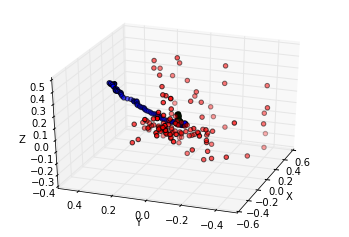

In [133]:
from mpl_toolkits.mplot3d import Axes3D
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df_walk_x.iloc[0], df_walk_y.iloc[0],df_walk_z.iloc[0],c = "r")
threedee.scatter(df_standing_x.iloc[0], df_standing_y.iloc[0],df_standing_z.iloc[0], c="g")
threedee.scatter(df_sitting_x.iloc[0], df_sitting_y.iloc[0],df_sitting_z.iloc[0], c = "b")
threedee.set_xlabel('X')
threedee.set_ylabel('Y')
threedee.set_zlabel('Z')
threedee.azim = 200
#threedee.elev = -45
plt.show()


<h3> Grap chuncks of data </h3> 

<p>10 first instances of walking <p>

In [134]:
df_walk_x[:10]

         0         1         2         3         4         5         6    \
78  0.376798  0.382064  0.119208 -0.289914 -0.315472 -0.083072  0.023282   
79  0.423367  0.493977  0.303323 -0.028609 -0.311065 -0.353213 -0.191994   
80  0.014787 -0.153246 -0.249895 -0.265279 -0.305845 -0.214722 -0.036103   
81 -0.018218 -0.095802 -0.099190 -0.039455 -0.013821  0.030053  0.041788   
82  0.210739  0.258105  0.249927  0.150712  0.023927  0.065996  0.239245   
83  0.387277  0.107015 -0.165145 -0.249274 -0.212410 -0.305623 -0.372618   
84 -0.274582 -0.260473 -0.193143 -0.142707 -0.046799  0.204299  0.474642   
85  0.449734  0.403512  0.169847 -0.217966 -0.436804 -0.235597  0.006062   
86  0.047932  0.053133  0.080669  0.153277  0.244056  0.347647  0.394363   
87  0.259279  0.271774  0.330522  0.343202  0.261646  0.009223 -0.248975   

         7         8         9      ...          118       119       120  \
78  0.009530 -0.050622 -0.069714    ...     0.328153  0.344551  0.398876   
79 -0.02928

<p> Next 10 instances <p>

In [135]:
df_walk_x[10:20]

         0         1         2         3         4         5         6    \
88 -0.217331 -0.033846  0.068685 -0.008405 -0.227267 -0.248130 -0.233984   
89 -0.130107 -0.059396 -0.049586 -0.104072 -0.122832 -0.038568  0.027569   
90  0.154265  0.221491  0.260284  0.253933  0.203163  0.116094 -0.016571   
91  0.479486  0.409970  0.172794 -0.017946 -0.159512 -0.293337 -0.346210   
92 -0.327476 -0.222851 -0.167394 -0.114615  0.049833  0.306757  0.465717   
93  0.390961  0.227254 -0.090405 -0.245044 -0.150151  0.117848  0.156285   
94 -0.188378 -0.259398 -0.294942 -0.207323 -0.108518 -0.025816 -0.044634   
95 -0.103690 -0.020980 -0.019794 -0.074255 -0.001778  0.077082  0.208169   
96  0.329154  0.246986  0.070441 -0.081146 -0.073305  0.129004  0.342846   
97  0.399252  0.178368 -0.035989 -0.121425 -0.066831 -0.060099 -0.160440   

         7         8         9      ...          118       119       120  \
88 -0.311191 -0.219851 -0.114242    ...    -0.274486 -0.112547 -0.014539   
89  0.02913

<h4> Generalized method </h4>

In [136]:
def getInstances(dataFrame, beg, end):
    return dataFrame[beg:end]

getInstances(df_walk_x,0,2)

         0         1         2         3         4         5         6    \
78  0.376798  0.382064  0.119208 -0.289914 -0.315472 -0.083072  0.023282   
79  0.423367  0.493977  0.303323 -0.028609 -0.311065 -0.353213 -0.191994   

         7         8         9      ...          118       119       120  \
78  0.009530 -0.050622 -0.069714    ...     0.328153  0.344551  0.398876   
79 -0.029289  0.037625  0.040067    ...     0.050554  0.015661 -0.064304   

         121       122       123       124       125       126       127  
78  0.405265  0.270711 -0.125565 -0.422726 -0.288835 -0.011186  0.092880  
79 -0.173925 -0.177827 -0.243675 -0.390169 -0.315476 -0.143001 -0.040035  

[2 rows x 128 columns]

In [137]:
<h2> Mean values function </h2>>>

SyntaxError: invalid syntax (<ipython-input-137-29cbecdaf7d9>, line 1)

In [ ]:
def getMeanValues(data_frame, start, size):
    res = []
    for i in range(start, start + size):
        res.append(data_frame.iloc[i].mean())
    return res


<h3> Plot mean values from walking, standing and sitting</h3>
<p>Blue: walking Red: Standing, Yellow: Sitting<p>

In [ ]:
start = 500
size = 100

df_walk_mean_x = getMeanValues(df_walk_x, start, size)
df_walk_mean_y = getMeanValues(df_walk_y, start, size)
df_walk_mean_z = getMeanValues(df_walk_z, start, size)

df_standing_mean_x = getMeanValues(df_standing_x, start, size)
df_standing_mean_y = getMeanValues(df_standing_y, start, size)
df_standing_mean_z = getMeanValues(df_standing_z, start, size)

df_sitting_mean_x = getMeanValues(df_sitting_x, start, size)
df_sitting_mean_y = getMeanValues(df_sitting_y, start, size)
df_sitting_mean_z = getMeanValues(df_sitting_z, start, size)

from mpl_toolkits.mplot3d import Axes3D
threedee = plt.figure().gca(projection='3d')
for i in range(0,len(df_walk_mean_x)):
    threedee.scatter(df_walk_mean_x[i], df_walk_mean_y[i],df_walk_mean_z[i],c = "r")
    threedee.scatter(df_standing_mean_x[i], df_standing_mean_y[i],df_standing_mean_z[i],c = "b")
    threedee.scatter(df_sitting_mean_x[i], df_sitting_mean_y[i],df_sitting_mean_z[i],c = "y")
threedee.set_xlabel('X')
threedee.set_ylabel('Y')
threedee.set_zlabel('Z')
#threedee.azim = 200
#threedee.elev = -45
plt.show()


<h3> Acceleration in x-axis while walking </h3>

In [ ]:
plt.plot(range(128), df_walk_x.iloc[0])
plt.axis([0, 128, -0.6, 0.6])
plt.show()
plt.plot(range(128), df_walk_x.iloc[1])
plt.axis([0, 128, -0.6, 0.6])
plt.show()

<h3>Mean acceleration in x-axis while walking</h3>

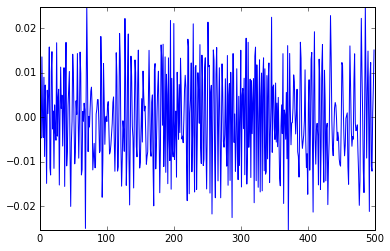

In [138]:
df_walk_mean_x = getMeanValues(df_walk_x, 0, 500)

plt.plot(range(len(df_walk_mean_x)), df_walk_mean_x)
plt.axis([0, len(df_walk_mean_x), min(df_walk_mean_x), max(df_walk_mean_x)])
plt.show()

<h3>Mean acceleration in y-axis while walking</h3>

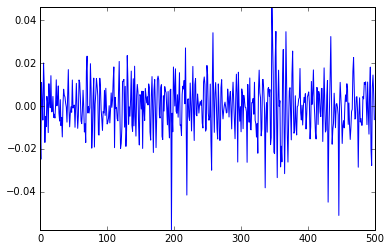

In [139]:
df_walk_mean_y = getMeanValues(df_walk_y, 0, 500)

plt.plot(range(len(df_walk_mean_y)), df_walk_mean_y)
plt.axis([0, len(df_walk_mean_y), min(df_walk_mean_y), max(df_walk_mean_y)])
plt.show()

<h3>Mean acceleration in z-axis while walking</h3>

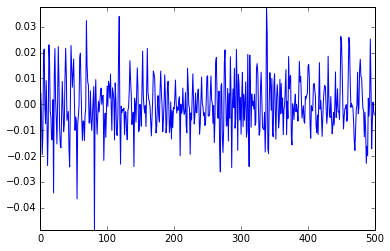

In [140]:
df_walk_mean_z = getMeanValues(df_walk_z, 0, 500)

plt.plot(range(len(df_walk_mean_z)), df_walk_mean_z)
plt.axis([0, len(df_walk_mean_z), min(df_walk_mean_z), max(df_walk_mean_z)])
plt.show()

<h3>Get the standard deviation</h3>

In [148]:
def getSDValues(data_frame, start, size):
    values = []
    for i in range(start, start + size):
        values.append(data_frame.iloc[i].std())
    return values

df_walk_sd_x = getSDValues(df_walk_x, 0, 100)


0.219662191452


In [ ]:
plt.plot(range(len(df_walk_sd_x)), df_walk_sd_x)
plt.axis([0, len(df_walk_sd_x), min(df_walk_mean_z), max(df_walk_mean_z)])
plt.show()